In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

/Users/moayyadshahid/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
start = '2014-01-01'
end = '2024-07-03'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...,...
2637,2024-06-26,184.199997,185.929993,183.990005,185.369995,185.369995,13375700
2638,2024-06-27,185.645004,187.500000,185.449997,186.860001,186.860001,13025700
2639,2024-06-28,185.720001,186.580002,183.324997,183.419998,183.419998,23032400
2640,2024-07-01,184.479996,185.339996,182.729996,184.490005,184.490005,11815900


In [5]:
ma_100_days = data.Close.rolling(100).mean()

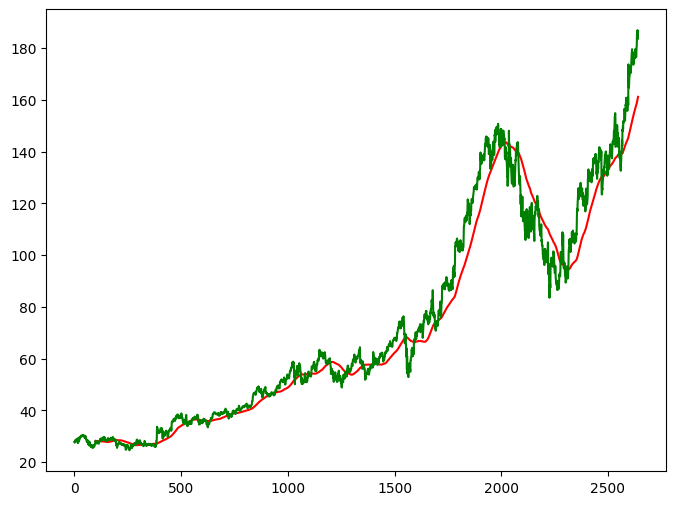

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

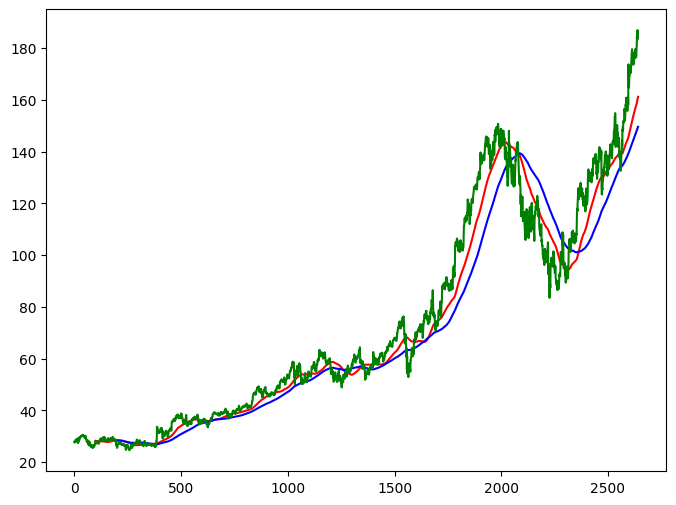

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2113

In [12]:
data_test.shape[0]

529

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/Users/moayyadshahid/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.0616
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0065
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - loss: 0.0071
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0052
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0050
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 0.0050
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - loss: 0.0045
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0038
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0034
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 0.0038
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0043
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0035
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0034
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0040
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - lo

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100 : i])
    y.append(data_test_scale[i, 0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict * scale

In [29]:
y = y * scale

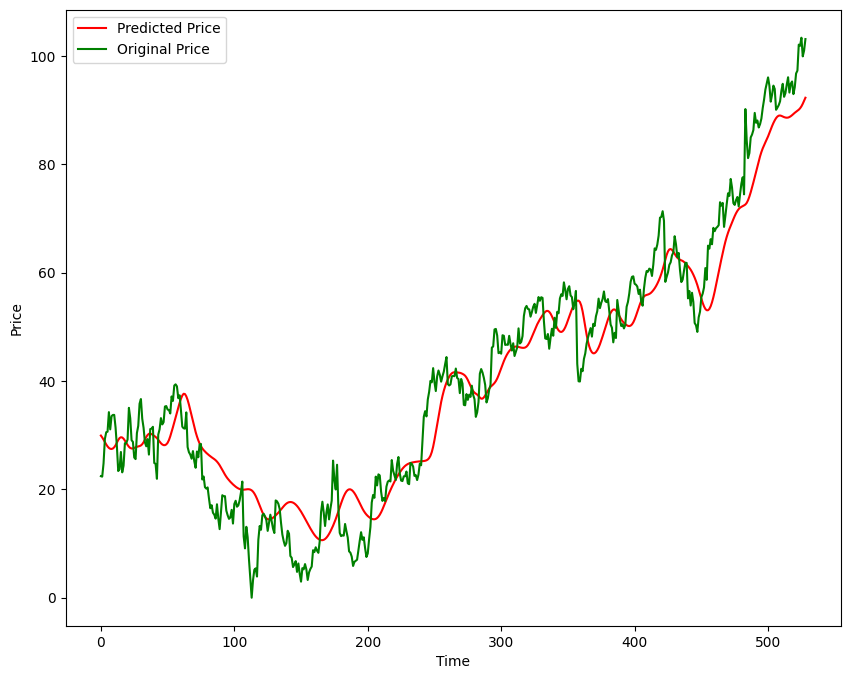

In [30]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')